# Graficos de Velas y Quant con Plotly y Cufflinks

## Importamos librerías
Para algunas de las practicas vamos a usar: Datareader, yfinance, qgrid, plotly y cufflinks

## Carga de datos de Yahoo finance

In [25]:
import pandas as pd
import yfinance as yf

symbol = 'MSFT'
ticker = yf.Ticker(symbol)
df2 = ticker.history(period = '150d',
                    interval = '1d',
                    actions=True,
                    auto_adjust=True)

In [26]:
df2.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-07-14 00:00:00-04:00,249.336613,253.884110,244.729399,252.829330,25102800,0.0,0.0
2022-07-15 00:00:00-04:00,254.461237,259.088341,253.515916,255.456314,29774100,0.0,0.0
2022-07-18 00:00:00-04:00,258.471401,259.556032,252.053153,252.998474,20975000,0.0,0.0
2022-07-19 00:00:00-04:00,256.312089,258.441570,252.431292,258.252502,25012600,0.0,0.0
2022-07-20 00:00:00-04:00,258.620675,263.566212,257.635558,260.979004,22788300,0.0,0.0


## Gráfico Velas con Plotly

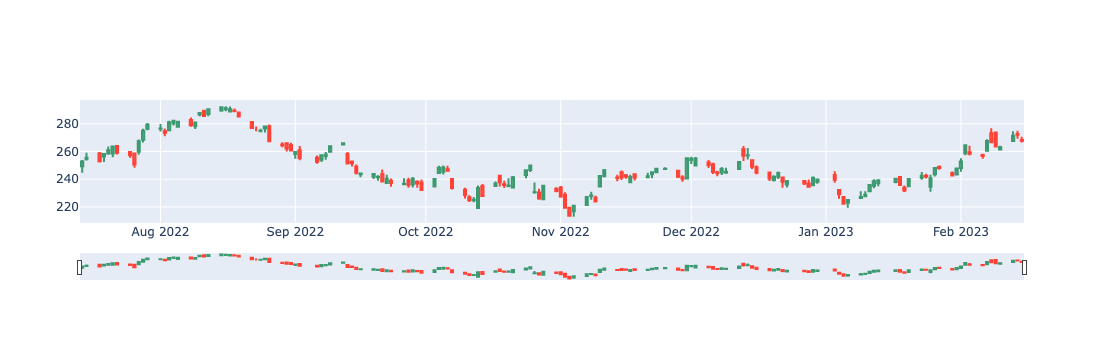

In [27]:
import plotly.graph_objects as go

candlestick = go.Candlestick(
                            x=df2.index,
                            open=df2['Open'],
                            high=df2['High'],
                            low=df2['Low'],
                            close=df2['Close']
                            )

fig = go.Figure(data=[candlestick])

fig.show()

## Velas con Cufflinks

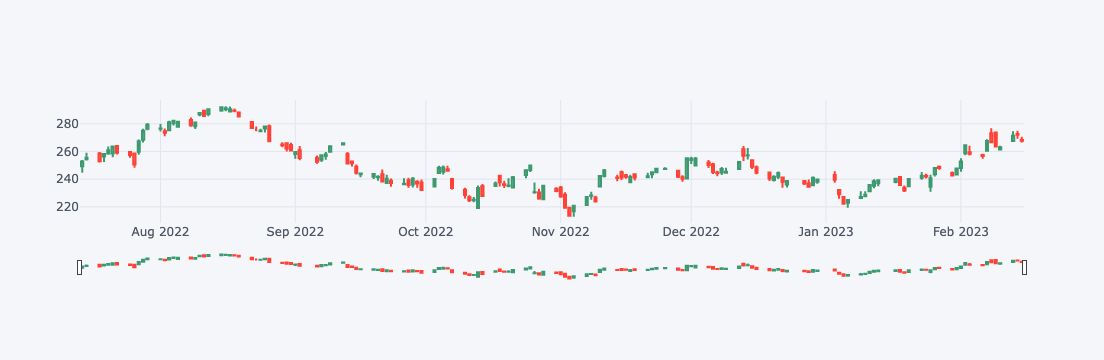

In [30]:
import cufflinks as cf

cf.set_config_file(theme='pearl',sharing='public',offline=True)
df2.iplot(kind="candle",
                          keys=["Open", "High", "Low", "Close"],
                          rangeslider=True
                          )

##  Gráfico abierto, alto, bajo, cerrado (OHLC)

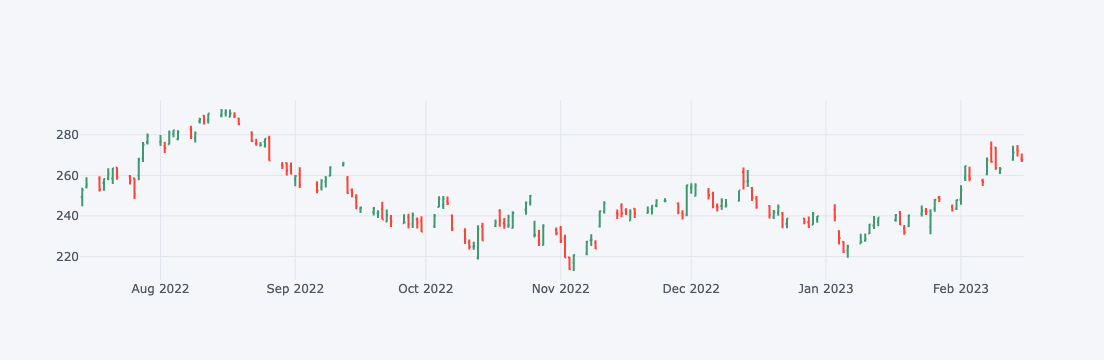

In [31]:
df2.iplot(kind="ohlc",
        keys=["Open", "High", "Low", "Close"])

## Quant de Cufflinks

### Bandas Bollinger, Resistencia, SMA (Simple Moving Average), RSI (Relative Strength Indicator) y Volumen

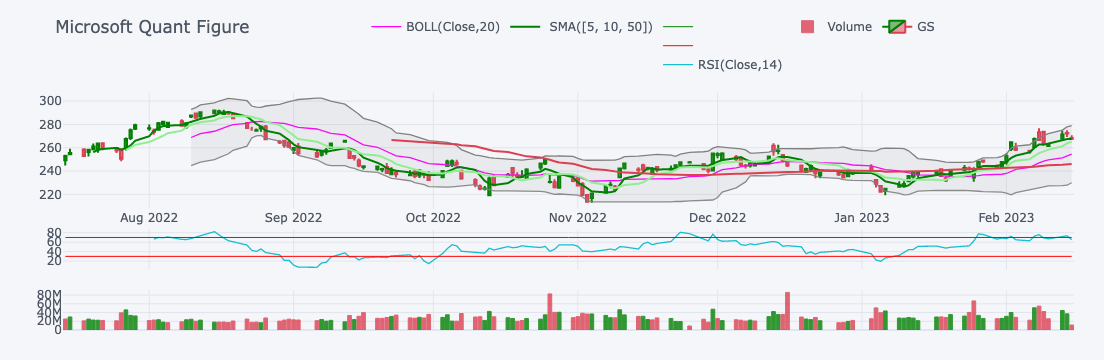

In [37]:
qf=cf.QuantFig(df2,title='Microsoft Quant Figure',legend='top',name='GS')

#Cada comando qf.add añade una variable al gráfico
qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
#qf.add_resistance(date='2023-02-10',on='close', color='orange')
qf.add_sma([5,10,50],width=2,color=['green','lightgreen', 'red'],legendgroup=True)
#qf.add_sma([14,50,100],width=2,color=['green','lightgreen','red'],legendgroup=True)
qf.add_rsi(periods=14,color='java')
#qf.add_macd()
qf.add_volume()

qf.iplot(up_color='green', down_color='red')

### ADX (Average Directional Index), CCI (Commodity Channel Indicator), DMI (Directional Movement Index) y EMA (Exponential Moving Average)

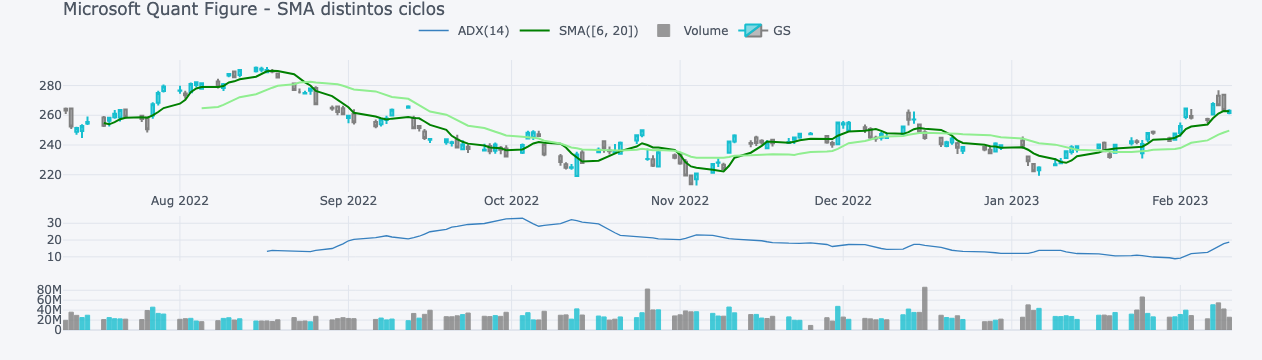

In [14]:
qf=cf.QuantFig(df2,title='Microsoft Quant Figure - SMA distintos ciclos',legend='top',name='GS')

#Cada comando qf.add añade un oscilador al gráfico
qf.add_adx()
#qf.add_cci()
#qf.add_dmi()
#qf.add_ema()
#qf.add_sma(color=['green'])
qf.add_sma([6,20],width=2,color=['green','lightgreen'],legendgroup=True)
qf.add_volume()

qf.iplot()